In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import seaborn as sns

In [2]:
df = pd.read_csv("../data library/Algodao_v1.csv", sep=";")
df = df.sort_values(by="Data")
df = df.reset_index(drop=True)
df.head()

,Data,Cultivo,Estadual,País,Id,Último,Abertura,Máxima,Mínima
0,2005-01-01,Algodão,41.3763,41.0963,3.0,4376.0,4451.0,4831.0,4240.0
1,2005-02-01,Algodão,40.0096,41.2643,3.0,5030.0,4420.0,5030.0,4261.0
2,2005-03-01,Algodão,37.3086,40.0517,3.0,5303.0,5015.0,5460.0,4775.0
3,2005-04-01,Algodão,39.1540,40.9909,3.0,5800.0,5315.0,6050.0,5055.0
4,2005-05-01,Algodão,35.0431,38.6424,3.0,4864.0,5770.0,5800.0,4850.0


In [3]:
from bcb import PTAX
from bcb import currency

ptax = PTAX()

df_usd = currency.get(['USD'],
                  start='2004-03-01',
                  end='2024-09-01',
                  side='ask')

df_usd["Date"]=df_usd.index
df_usd["Month"] = df_usd["Date"].dt.month
df_usd["Year"] = df_usd["Date"].dt.year
df_usd["Day"] = 1
df_usd["Aux"] = df_usd["Year"].astype(str) +"-"+ df_usd["Month"].astype(str)
df_usd = df_usd.groupby("Aux").agg(
    USD = ("USD", "mean"),
    day = ("Day", "first"),
    month = ("Month", "first"),
    year = ("Year", "first"),
).reset_index(drop=True)

df_usd["Data"] = pd.to_datetime(df_usd[['year', 'month', 'day']])
df_usd = df_usd[["Data", "USD"]].sort_values(by="Data").reset_index(drop=True)

In [9]:
clima = pd.read_csv("../data library/Clima/MT_dados.csv", sep=';')
clima.rename(columns={"PRECIPITACAO TOTAL":"precipitacao", "TEMPERATURA MEDIA":"temperatura"}, inplace=True)

clima["precipitacao"] = clima.precipitacao.str.replace(',', '.')
clima["temperatura"] = clima.temperatura.str.replace(',', '.')

clima.bfill(inplace=True)
clima.head()

,Data Medicao,precipitacao,temperatura
0,31/03/2004,175.4,24.9
1,30/04/2004,175.4,24.5
2,31/05/2004,23,21.7
3,30/06/2004,18.8,22.1
4,31/07/2004,38,22.2


In [10]:
df["USD"] = df_usd["USD"]
df["Precipitacao"] = clima["precipitacao"].astype(float)
df["Temperatura"] = clima["temperatura"].astype(float)
df['lag_Estadual'] = df['Estadual'].shift(1)
df.head()

,Data,Cultivo,Estadual,País,Id,Último,Abertura,Máxima,Mínima,OMC,USD,Precipitacao,Temperatura,lag_Estadual
0,2006-01-01,Algodão,44.2359,37.0378,3.0,5572.0,5440.0,5685.0,5435.0,22,2.905457,175.4,24.9,NaN
1,2006-02-01,Algodão,41.4613,42.0150,3.0,5600.0,5560.0,5765.0,5495.0,2,2.905985,175.4,24.5,44.2359
2,2006-03-01,Algodão,40.9489,42.9952,3.0,5265.0,5630.0,5630.0,5202.0,28,3.100419,23.0,21.7,41.4613
3,2006-04-01,Algodão,41.7270,41.9927,3.0,4990.0,5285.0,5445.0,4830.0,22,3.129148,18.8,22.1,40.9489
4,2006-05-01,Algodão,38.4750,39.5768,3.0,5094.0,4925.0,5215.0,4865.0,32,3.036777,38.0,22.2,41.7270


In [11]:
df_omc = pd.read_csv("../data library/indice_omc.csv", sep=',')
df_omc = df_omc[:-3]
df_omc.rename(columns={"Index":"OMC"}, inplace=True)
df_1 = df.merge(df_omc, how="right")
df = df_1.copy()

EDA

In [12]:
df.describe()

,Estadual,País,Id,Último,Abertura,Máxima,Mínima,OMC,USD,Precipitacao,Temperatura,lag_Estadual
count,225.000000,225.000000,225.0,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,224.000000
mean,84.076253,85.171279,3.0,7765.635556,7769.426667,8250.822222,7314.093333,6.453333,2.966838,104.108444,24.569778,83.897047
std,47.372412,47.254858,0.0,2368.771983,2409.743041,2707.085746,2080.587461,17.572523,1.207331,113.174617,1.166142,47.402010
min,34.023900,35.674900,3.0,4206.000000,4125.000000,4650.000000,3670.000000,-36.000000,1.563938,0.000000,21.400000,34.023900
25%,48.667500,50.542200,3.0,6360.000000,6364.000000,6654.000000,6046.000000,-7.000000,2.028079,14.000000,24.000000,48.667250
50%,72.161200,72.776500,3.0,7351.000000,7350.000000,7716.000000,7021.000000,6.000000,2.448261,42.000000,24.400000,71.476000
75%,100.886500,101.853400,3.0,8446.000000,8450.000000,8873.000000,8050.000000,19.000000,3.773171,177.000000,25.300000,99.676150
max,256.115400,250.325600,3.0,20023.000000,20577.000000,22700.000000,18500.000000,53.000000,5.651391,492.200000,27.800000,256.115400


In [13]:
df[["Estadual", "País", "Último", "Abertura", "Máxima", "Mínima", "USD", "Precipitacao", "Temperatura", "lag_Estadual", "OMC"]].corr()

,Estadual,País,Último,Abertura,Máxima,Mínima,USD,Precipitacao,Temperatura,lag_Estadual,OMC
Estadual,1.000000,0.998564,0.484503,0.477376,0.460735,0.505687,0.811702,-0.326767,0.198958,0.987945,0.130612
País,0.998564,1.000000,0.473921,0.469682,0.450969,0.496238,0.825413,-0.326550,0.205496,0.990878,0.131947
Último,0.484503,0.473921,1.000000,0.945745,0.974469,0.984702,0.125240,-0.358974,-0.044792,0.469186,0.241018
Abertura,0.477376,0.469682,0.945745,1.000000,0.982230,0.964103,0.122777,-0.364755,-0.036644,0.480564,0.266100
Máxima,0.460735,0.450969,0.974469,0.982230,1.000000,0.969844,0.101828,-0.353798,-0.037648,0.453686,0.271394
Mínima,0.505687,0.496238,0.984702,0.964103,0.969844,1.000000,0.142665,-0.366648,-0.049365,0.491055,0.225509
USD,0.811702,0.825413,0.125240,0.122777,0.101828,0.142665,1.000000,-0.200419,0.273670,0.819901,0.092943
Precipitacao,-0.326767,-0.326550,-0.358974,-0.364755,-0.353798,-0.366648,-0.200419,1.000000,0.103166,-0.330773,0.019827
Temperatura,0.198958,0.205496,-0.044792,-0.036644,-0.037648,-0.049365,0.273670,0.103166,1.000000,0.217034,0.235824
lag_Estadual,0.987945,0.990878,0.469186,0.480564,0.453686,0.491055,0.819901,-0.330773,0.217034,1.000000,0.144739


Text(0.5, 1.0, 'Correlation Heatmap')

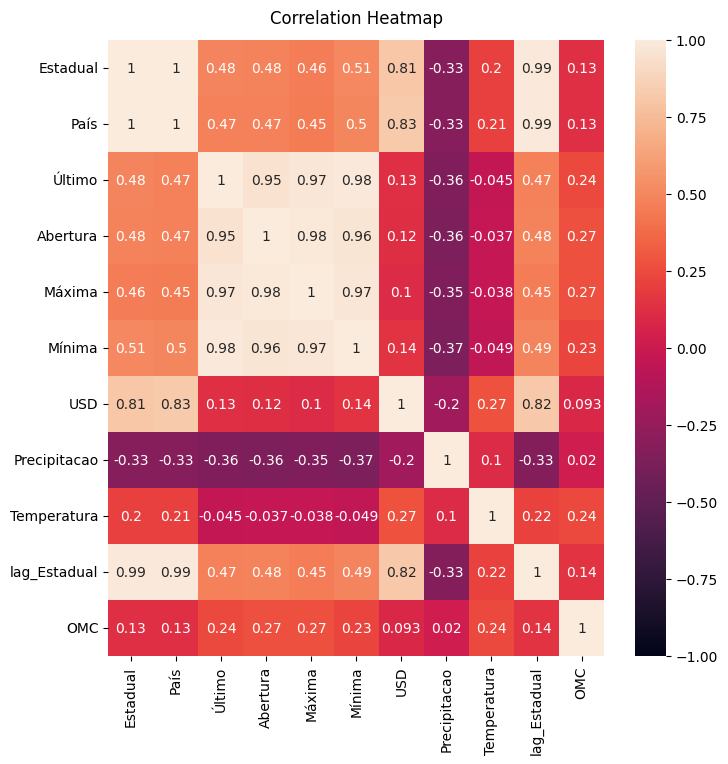

In [14]:
plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(df[["Estadual", "País", "Último", "Abertura", "Máxima", "Mínima", "USD", "Precipitacao", "Temperatura", "lag_Estadual","OMC"]].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

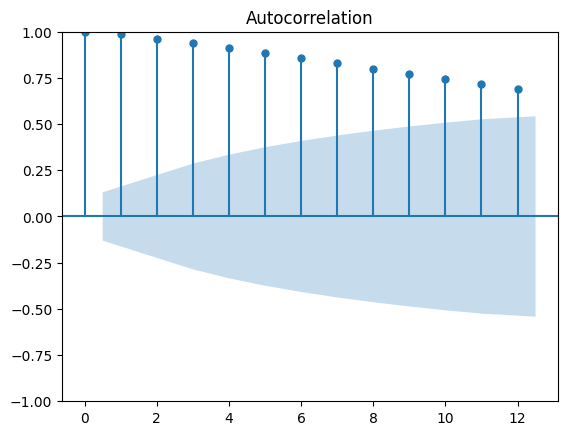

<Figure size 3000x1000 with 0 Axes>

In [15]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df.Estadual, lags=12)
plt.figure(figsize=(30,10))
plt.show()

In [16]:
train_size = 0.8
test_size = 0.2

train_start = df.Data[0]
train_end = df.Data[int(len(df)*0.8)]

test_start = df.Data[int(len(df)*0.8)]
test_end = df.Data[len(df)-1]

print(train_start)
print(train_end)
print(test_start)
print(test_end)


2006-01-01
2021-01-01
2021-01-01
2024-09-01


Linear Regression

In [17]:
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

In [18]:
df1 = df.copy()

df1['Data'] = pd.to_datetime(df1['Data'])
df1["Time"] = df.index

train_df = df1[:(int(len(df1)*0.8))].copy()
test_df = df1[(int(len(df1)*0.8)+1):].copy()

In [19]:
X = df1.loc[:, ['Time']]  # features
y = df1.loc[:, 'Estadual']  # target

AutoRegressive

In [20]:
df1 = df.copy()

df1['Data'] = pd.to_datetime(df1['Data'])
df1.set_index('Data', inplace = True)
df1.dropna(inplace=True)
df1 = df1.asfreq('ME', method = 'bfill') 
df1 = df1[["Estadual", "País"]]

train_df = df1[:(int(len(df1)*0.8))].copy()
test_df = df1[(int(len(df1)*0.8)):].copy()

display(df1)

,Estadual,País
Data,,
2006-02-28,40.9489,42.9952
2006-03-31,41.7270,41.9927
2006-04-30,38.4750,39.5768
2006-05-31,40.7137,41.4922
2006-06-30,39.9166,41.0764
...,...,...
2024-04-30,121.0131,127.7394
2024-05-31,122.9271,127.7055
2024-06-30,127.9005,132.3400


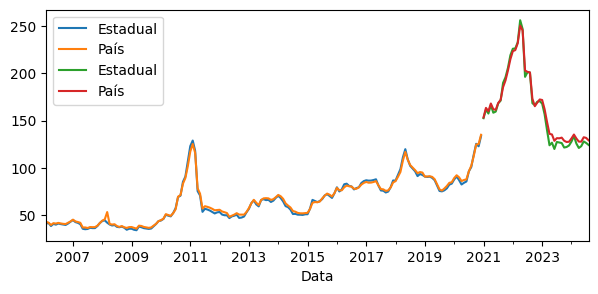

In [21]:
fig, ax = plt.subplots(figsize=(7, 3))
df1.loc[train_start:train_end].plot(ax=ax, label = "Train")
df1.loc[test_start:test_end].plot(ax=ax, label = "Test")
ax.legend()

MAE: 58.110734959536934
RMSE: 72.74387763786811
MAPE: 0.31836430992092946
R-Squared: -2.6247109116049794


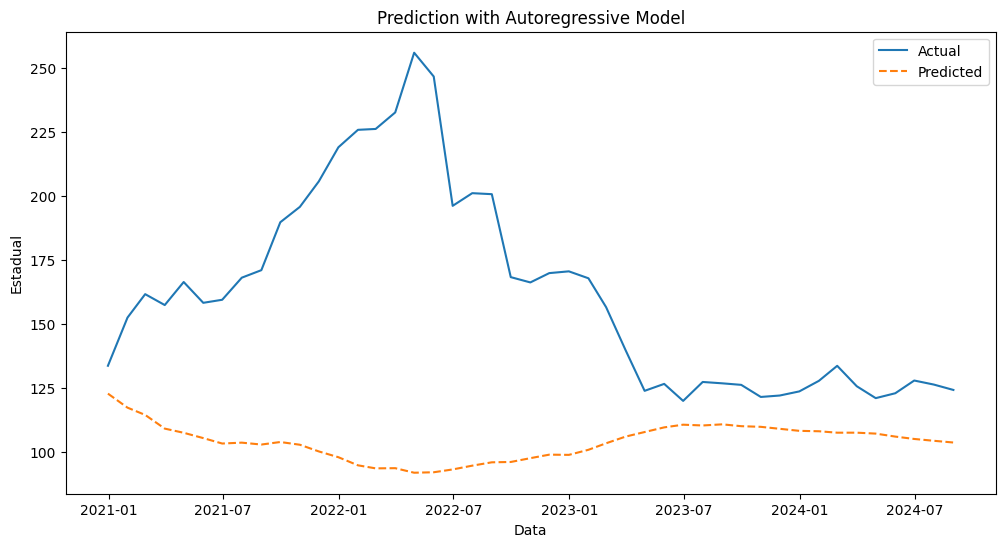

In [22]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error
from sklearn.metrics import r2_score


# split dataset
X = df1[["Estadual"]].values
train = train_df["Estadual"]
test = test_df["Estadual"]
# train autoregression
model = AutoReg(train, lags=29)
model_fit = model.fit()
# print('Coefficients: %s' % model_fit.params)

predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
# for i in range(len(predictions)):
#     print('predicted=%f, expected=%f' % (predictions[i], test[i]))

test_df["Data"] = test_df.index

print(f"MAE: {mean_absolute_error(test, predictions)}")
print(f"RMSE: {root_mean_squared_error(test, predictions)}")
print(f"MAPE: {mean_absolute_percentage_error(test, predictions)}")
print(f"R-Squared: {r2_score(test, predictions)}")

plt.figure(figsize=(12, 6))
plt.plot(test_df["Data"], test, label='Actual')
plt.plot(test_df["Data"], predictions, label='Predicted', linestyle='--')
plt.xlabel('Data')
plt.ylabel('Estadual')
plt.legend()
plt.title('Prediction with Autoregressive Model')
plt.show()

In [23]:
from bcb import PTAX
from bcb import currency

ptax = PTAX()

df_usd = currency.get(['USD'],
                  start='2004-03-01',
                  end='2024-09-01',
                  side='ask')

df_usd["Date"]=df_usd.index
df_usd["Month"] = df_usd["Date"].dt.month
df_usd["Year"] = df_usd["Date"].dt.year
df_usd["Day"] = 1
df_usd["Aux"] = df_usd["Year"].astype(str) +"-"+ df_usd["Month"].astype(str)
df_usd = df_usd.groupby("Aux").agg(
    USD = ("USD", "mean"),
    day = ("Day", "first"),
    month = ("Month", "first"),
    year = ("Year", "first"),
).reset_index(drop=True)

df_usd["Data"] = pd.to_datetime(df_usd[['year', 'month', 'day']])
df_usd = df_usd[["Data", "USD"]].sort_values(by="Data").reset_index(drop=True)

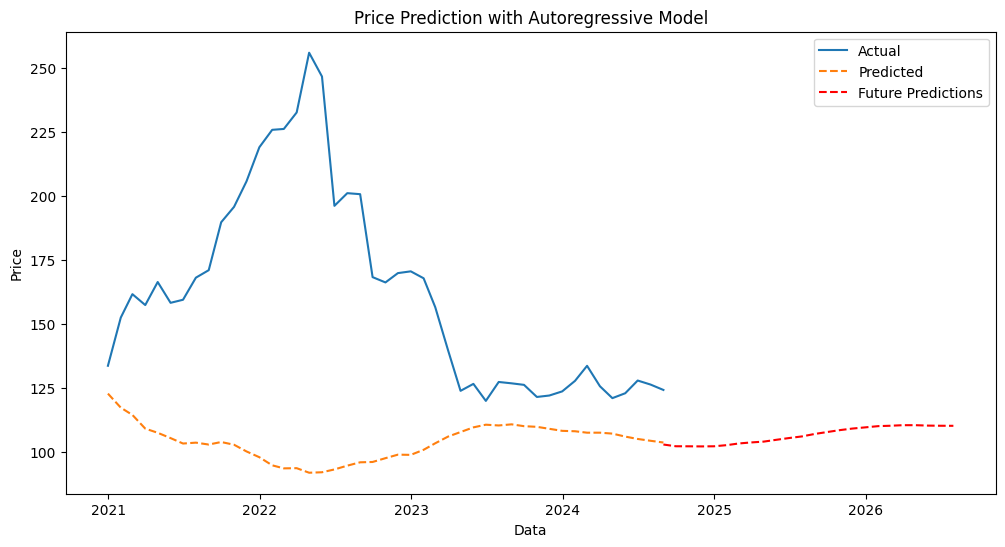

In [24]:
# Define the number of future time steps you want to predict (1 week)
forecast_steps = 24
 
# Extend the predictions into the future for one year
future_indices = range(len(test_df), len(test_df) + forecast_steps)
future_predictions = model_fit.predict(start=len(train_df), end=len(train_df) + len(test_df) + forecast_steps - 1, dynamic=False)

# Create date indices for the future predictions
future_dates = pd.date_range(start=test_df['Data'].iloc[-1], periods=forecast_steps, freq='ME')
 
# Plot the actual data, existing predictions, and one year of future predictions
plt.figure(figsize=(12, 6))
plt.plot(test, label='Actual')
plt.plot(predictions, label='Predicted', linestyle='--')
plt.plot(future_dates, future_predictions[-forecast_steps:], label='Future Predictions', linestyle='--', color='red')
plt.xlabel('Data')
plt.ylabel('Price')
plt.legend()
plt.title('Price Prediction with Autoregressive Model')
plt.show()

In [25]:
future_predictions[-forecast_steps:]

2024-09-30    102.870911
2024-10-31    102.195166
2024-11-30    102.175775
2024-12-31    102.132505
2025-01-31    102.180752
2025-02-28    102.632164
2025-03-31    103.270675
2025-04-30    103.693722
2025-05-31    104.012749
2025-06-30    104.737618
2025-07-31    105.408709
2025-08-31    106.042719
2025-09-30    107.010838
2025-10-31    107.763253
2025-11-30    108.516506
2025-12-31    109.121439
2026-01-31    109.588599
2026-02-28    110.064665
2026-03-31    110.210308
2026-04-30    110.430613
2026-05-31    110.434857
2026-06-30    110.270953
2026-07-31    110.210746
2026-08-31    110.188773
Freq: ME, dtype: float64

ARMA & ARIMA

In [26]:
#Import libraries 
import inspect
import time
import warnings
import plotly.express as px
import seaborn as sns

from sklearn.metrics import mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings("ignore")

In [27]:
df2 = df.copy()

df2['Data'] = pd.to_datetime(df2['Data'])
#df2.set_index('Data', inplace = True)
#df2.dropna(inplace=True)
#df2 = df2.asfreq('ME', method = 'bfill') 
df2 = df2[["Data","Estadual"]]


df2["Month"] = df2["Data"].dt.month
df2["Quarter"] = df2["Data"].dt.quarter
df2["Year"] = df2["Data"].dt.year

train_df = df2[:(int(len(df2)*0.8))].copy()
test_df = df2[(int(len(df2)*0.8)):].copy()

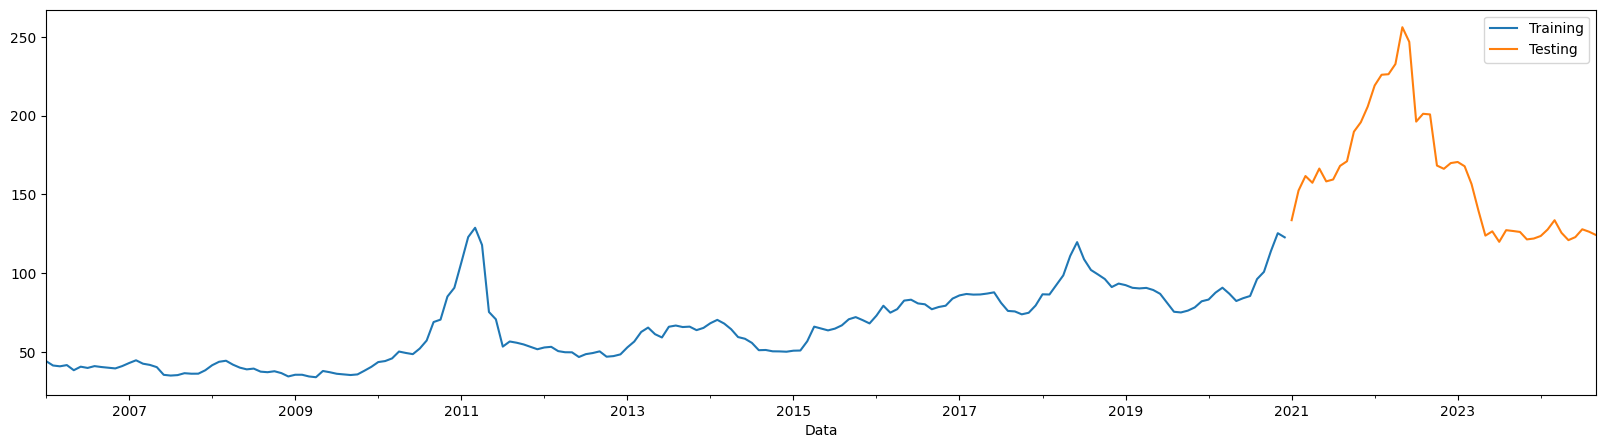

In [28]:
figure, ax = plt.subplots(figsize=(20, 5))
train_df.plot(ax=ax, label="Training", x="Data", y="Estadual")
test_df.plot(ax=ax, label="Testing", x="Data", y="Estadual")
plt.show()

In [6]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(df2['Estadual'])
# Output the results
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: -1.131198
p-value: 0.702472


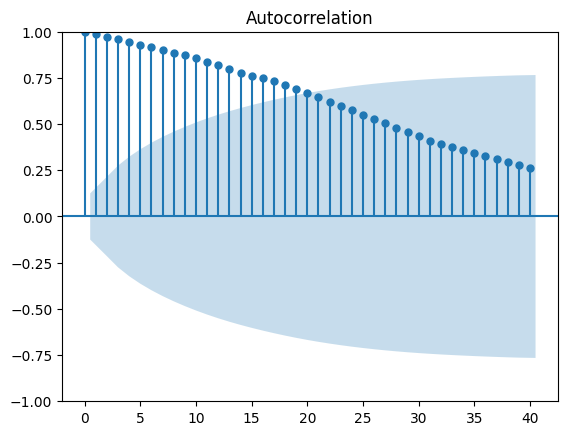

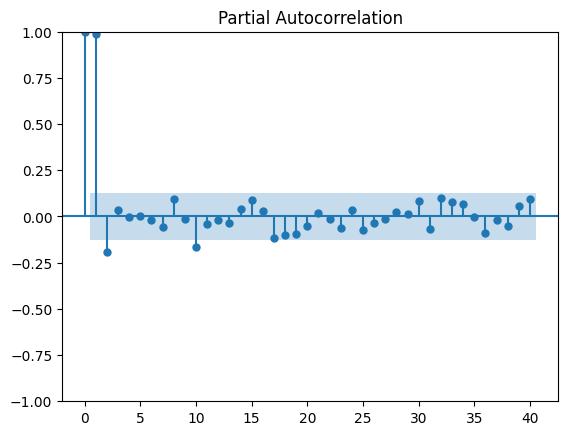

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df2['Estadual'], lags=40)
plot_pacf(df2['Estadual'], lags=40)
plt.show()

In [29]:
training_data = train_df.copy()
testing_data = test_df.copy()

In [30]:
training_data = training_data.drop(columns=["Data"])
testing_dates = testing_data["Data"]
testing_data = testing_data.drop(columns=["Data"])

X_train = training_data[["Month", "Quarter", "Year"]]
y_train = training_data["Estadual"]

X_test = testing_data[["Month", "Quarter", "Year"]]
y_test = testing_data["Estadual"]

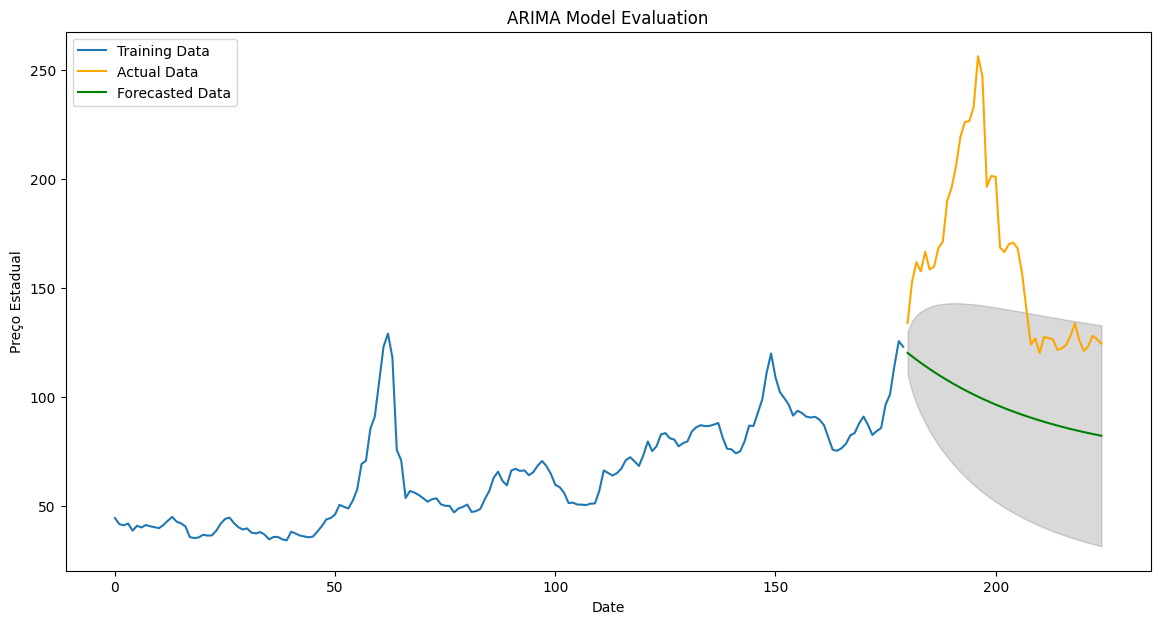

RMSE: 73.68542236746066


In [31]:
from sklearn.metrics import mean_squared_error

# Split the data into train and test
train_size = int(len(df2) * 0.8)
train, test = df2[0:train_size], df2[train_size:len(df2)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['Estadual'], order=(1, 0, 1))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['Estadual'], test_forecast_series)
rmse = mse**0.5

plt.figure(figsize=(14,7))
plt.plot(train['Estadual'], label='Training Data')
plt.plot(test['Estadual'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Preço Estadual')
plt.legend()
plt.show()

print('RMSE:', rmse)

In [32]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error
from sklearn.metrics import r2_score

def evaluate_model(y_test, prediction):
  print(f"MAE: {mean_absolute_error(y_test, prediction)}")
  print(f"RMSE: {root_mean_squared_error(y_test, prediction)}")
  print(f"MAPE: {mean_absolute_percentage_error(y_test, prediction)}")
  print(f"R-Squared: {r2_score(y_test, prediction)}")


In [33]:
evaluate_model(test['Estadual'], test_forecast_series)

MAE: 65.19244419312176
RMSE: 73.68542236746066
MAPE: 0.38008919626756216
R-Squared: -2.719149486110757


XGBoost

In [34]:
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

# XGBoost
cv_split = TimeSeriesSplit(n_splits=2, test_size=len(X_test))
model = XGBRegressor()
parameters = {
    "max_depth": [3, 4, 6, 5, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],
    "n_estimators": [100, 300, 500, 700, 900, 1000],
    "colsample_bytree": [0.3, 0.5, 0.7]
}


grid_search = GridSearchCV(estimator=model, cv=cv_split, param_grid=parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=2, test_size=45),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, impor...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.3, 0.5, 0.7],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
                         'max_depth': [3, 4, 6, 5, 10],
                         'n_estimators': [100, 300, 500, 700, 900, 1000]})

In [35]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error

def evaluate_model(y_test, prediction):
  print(f"MAE: {mean_absolute_error(y_test, prediction)}")
  print(f"RMSE: {root_mean_squared_error(y_test, prediction)}")
  print(f"MAPE: {mean_absolute_percentage_error(y_test, prediction)}")

def plot_predictions(testing_dates, y_test, prediction):
  df_test = pd.DataFrame({"date": testing_dates, "actual": y_test, "prediction": prediction })
  _, ax = plt.subplots(figsize=(10, 5))
  df_test.plot(ax=ax, label="Actual", x="date", y="actual")
  df_test.plot(ax=ax, label="Prediction", x="date", y="prediction")
  plt.legend(["Actual", "Prediction"])
  plt.show()

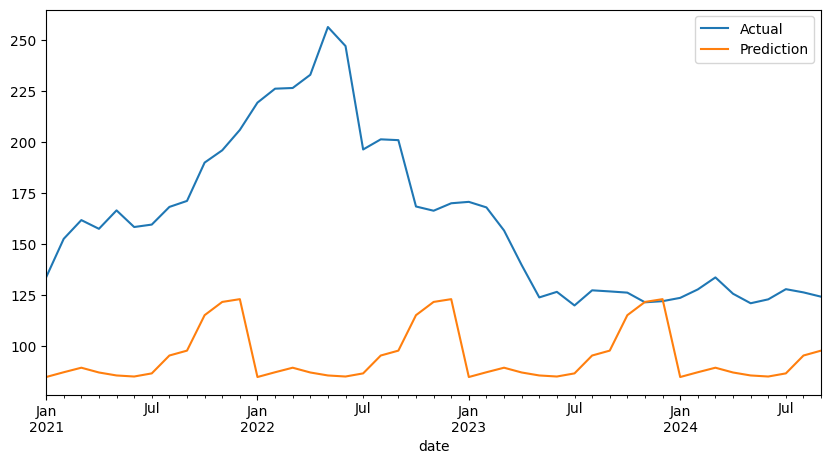

MAE: 67.02079594455296
RMSE: 78.25449292362615
MAPE: 0.3839060747297873


In [36]:

# Evaluating GridSearch results
prediction = grid_search.predict(X_test)
plot_predictions(testing_dates, y_test, prediction)
evaluate_model(y_test, prediction)